In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

airlines = pd.read_csv('airline-safety.csv')

airlines.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [2]:
air_stats = pd.read_csv('air_carrier_safety.csv')

air_stats.head()

,Year,Accidents: Total,Accidents: Fatal,"Fatal Accidents per 100,000 Departures",Fatalities: Total,Fatalities: Onboard
0,2000,49,2,0.018,89,89
1,2001,41,6,0.019,531,525
2,2002,34,0,0.000,0,0
3,2003,51,2,0.020,22,21
4,2004,23,1,0.009,13,13


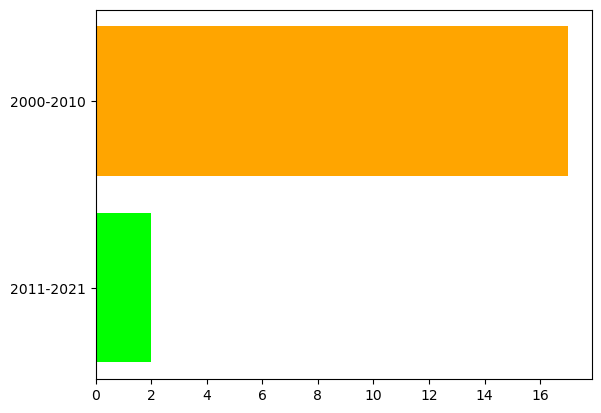

In [16]:
stats_2000_2010 = air_stats[air_stats['Year'] <= 2010]
stats_2011_2021 = air_stats[air_stats['Year'] > 2010]

sum_of_fatal_accidents_2000_2010 = stats_2000_2010['Accidents: Fatal'].sum()
sum_of_fatal_accidents_2011_2021 = stats_2011_2021['Accidents: Fatal'].sum()

fatal_accident_sums = {'2011-2021': sum_of_fatal_accidents_2011_2021, '2000-2010': sum_of_fatal_accidents_2000_2010}

plt.barh(list(fatal_accident_sums.keys()), list(fatal_accident_sums.values()), color = ['lime', 'orange'])
plt.show()

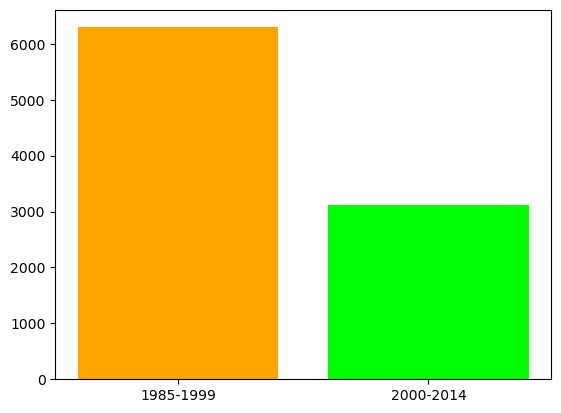

In [19]:
sum_of_fatalities_1985_1999 = airlines['fatalities_85_99'].sum()
sum_of_fatalities_2000_2014 = airlines['fatalities_00_14'].sum()

fatality_sums = {'1985-1999': sum_of_fatalities_1985_1999, '2000-2014': sum_of_fatalities_2000_2014}

plt.bar(list(fatality_sums.keys()), list(fatality_sums.values()), color = ['orange', 'lime'])
plt.show()

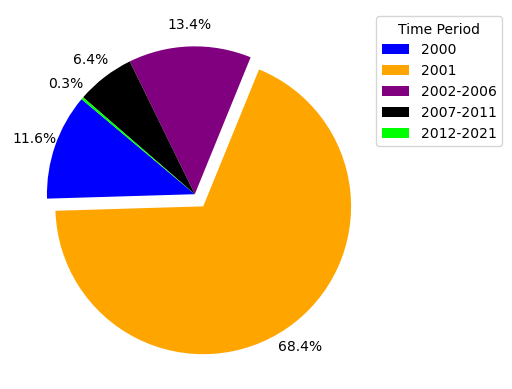

In [53]:
slices_year_range = ['2000', '2001', '2002-2006', '2007-2011', '2012-2021']
onboard_fatalities_by_range = [air_stats['Fatalities: Onboard'][0], air_stats['Fatalities: Onboard'][1], 
                               sum(air_stats['Fatalities: Onboard'][2:7]), sum(air_stats['Fatalities: Onboard'][7:12]), 
                               sum(air_stats['Fatalities: Onboard'][12:22])]
explode = (0, 0.1, 0, 0, 0)

plt.pie(onboard_fatalities_by_range, colors=['blue', 'orange', 'purple', 'black', 'lime'], autopct='%1.1f%%', 
        pctdistance=1.15, startangle = 140, explode = explode)
plt.legend(title = 'Time Period', labels = slices_year_range, loc = 'upper right', bbox_to_anchor=(1.35, 1))
plt.show()

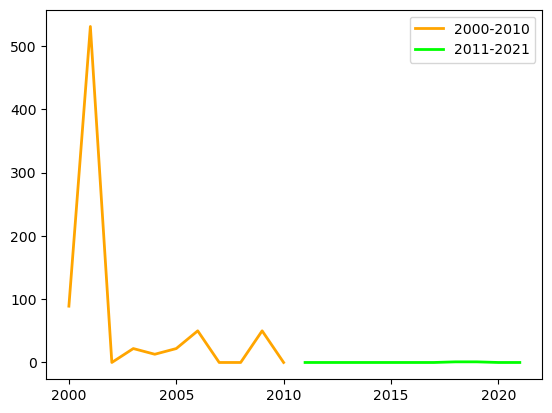

In [70]:
plt.plot(air_stats['Year'].head(11), air_stats['Fatalities: Total'][air_stats['Year'] < 2011], color = 'orange', 
         linewidth = 2, label = '2000-2010')
plt.plot(air_stats['Year'].tail(11), air_stats['Fatalities: Total'][air_stats['Year'] >= 2011], color = 'lime', 
         linewidth = 2, label = '2011-2021')
plt.legend()
plt.show()